Take the results of synthetic_classes.py. Plot the histograms of error values of the training and test classes to evaluate the interclass separation and hence the performance of the algorithm.

In [13]:
import os
import fnmatch
import csv
import numpy as np
import sys
sys.stdout.flush()
import math
from collections import Counter
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import segment_cluster_zscore as sc
import importlib
importlib.reload(sc)
np.random.seed(0)
from scipy.stats import zscore


In [14]:
results_file="valid_results_20190604_bp4.csv"
k_clusters=[150]
seg_lens=[10,50,100,150,200]

#"normal"/training lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
#"outlier"/test lightcurves
sine_file=np.loadtxt("synthetic_sines_range_wide.csv", delimiter=',')

no. clusters:  150 segment length:  10
Mean rho error: 	 0.23465102873112273 Max rho error:  0.4163671032193108


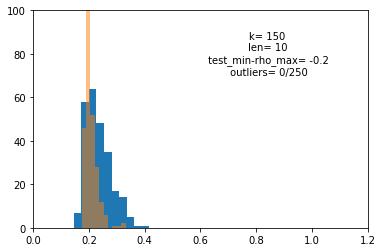

Mean test error: 	 0.20701714273408178
Min test-max rho error:  -0.24268147627418776
no. misclassified observations:  250

no. clusters:  150 segment length:  50
Mean rho error: 	 0.5390048837617271 Max rho error:  0.9872835359991066


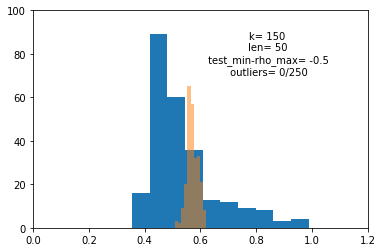

Mean test error: 	 0.571597989143255
Min test-max rho error:  -0.4786254862698418
no. misclassified observations:  250

no. clusters:  150 segment length:  100
Mean rho error: 	 0.7420591798614803 Max rho error:  1.1215486762750697


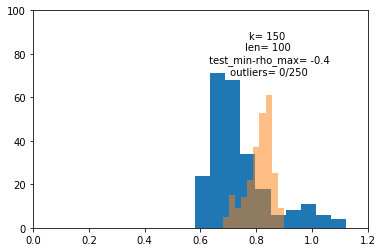

Mean test error: 	 0.8108312545441353
Min test-max rho error:  -0.4406962319670399
no. misclassified observations:  250

no. clusters:  150 segment length:  150
Mean rho error: 	 0.80621690065808 Max rho error:  1.0808878189622582


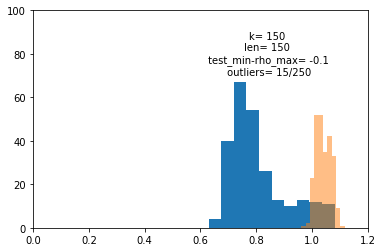

Mean test error: 	 1.0407145844562047
Min test-max rho error:  -0.11991584968350788
no. misclassified observations:  235

no. clusters:  150 segment length:  200
Mean rho error: 	 0.8651673630961436 Max rho error:  1.105107926098354


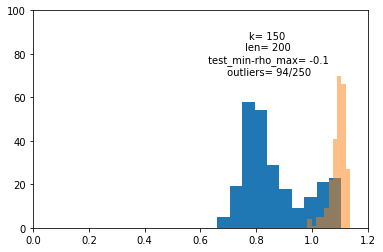

Mean test error: 	 1.0935532750644745
Min test-max rho error:  -0.12229894745997849
no. misclassified observations:  156



In [17]:
#enter the appropriate file name and hyperparameters used
results=np.loadtxt(results_file, dtype=float, delimiter=",")

for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        print("no. clusters: ", k_cluster, "segment length: ", seg_len)
        train=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==0)]
        max_rho=np.max(train[:,-1])
        print("Mean rho error: \t", np.mean(train[:,-1]), "Max rho error: ", max_rho)
        test=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==1)]
        min_test=np.min(test[:,-1])
        counter=0
        for t in test[:,-1]:
            if t<max_rho:
                counter+=1
        f = plt.figure()
        ax = f.add_subplot(111)
        plt.hist(train[:,-1])
        plt.hist(test[:,-1],alpha=0.5)
        plt.xlim([0,1.2])
        plt.ylim([0,100])
        plt.text(0.7,0.8,"k= {}\nlen= {}\n test_min-rho_max= {}\n outliers= {}/250".format(k_cluster, seg_len, round(min_test-max_rho,1), 250-counter),
                 ha='center', va='center', transform=ax.transAxes)
        plt.show()
        
        print("Mean test error: \t", np.mean(test[:,-1]))
        print("Min test-max rho error: ", min_test-max_rho)
        print("no. misclassified observations: ", counter)
        
        print()

Take the results of synthetic_classes.py. Extract the indices of X best/worst reconstructions of training and test classes to understand how to improve the algorithm; how to error of reconstruction of the different classes more different. 

In [18]:
results=np.loadtxt(results_file, dtype=float, delimiter=",")
#structure of the lines in the file: cluster number index, segment length index, training=0 test=1, lightcurve index, error)

extract_x=5

output=[]
for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        output.append(("no. clusters: ", k_cluster, "segment length: ", seg_len))
        output.append("worst/best training, wort/best test")
        train=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==0)]
        sorted_train=train[train[:,-1].argsort()]
        worst_train=sorted_train[-extract_x:,3].astype(int)
        best_train=sorted_train[0:extract_x,3].astype(int)        
        
        test=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==1)]
        sorted_test=test[test[:,-1].argsort()]
        worst_test=sorted_test[-extract_x:,3].astype(int)
        best_test=sorted_test[0:extract_x,3].astype(int)
        output.append(np.vstack((worst_train,best_train,worst_test,best_test)))

In [19]:
output

[('no. clusters: ', 150, 'segment length: ', 10),
 'worst/best training, wort/best test',
 array([[118,  31, 203,  89,  32],
        [177,  54, 173, 225, 104],
        [105, 122, 190,  73, 183],
        [215,  27, 128,  69, 220]]),
 ('no. clusters: ', 150, 'segment length: ', 50),
 'worst/best training, wort/best test',
 array([[ 97,   3, 118, 108, 196],
        [166, 141, 182, 176, 238],
        [ 91,  26,   1, 239,  48],
        [  0,  94,  87, 174,  22]]),
 ('no. clusters: ', 150, 'segment length: ', 100),
 'worst/best training, wort/best test',
 array([[108, 196, 120, 195, 233],
        [228, 183, 161,  70, 116],
        [ 44, 102,   4,  41, 168],
        [249,   0,  80, 195, 126]]),
 ('no. clusters: ', 150, 'segment length: ', 150),
 'worst/best training, wort/best test',
 array([[196, 108, 118,  60,  75],
        [184, 140, 125, 213, 110],
        [ 35, 227, 138,   1, 245],
        [137, 147, 124, 170, 106]]),
 ('no. clusters: ', 150, 'segment length: ', 200),
 'worst/best traini

take the ids of the best and worst reconstructions, repeat and plot 

('no. clusters: ', 150, 'segment length: ', 10)
Worst reconstructions of ordinary lightcurves


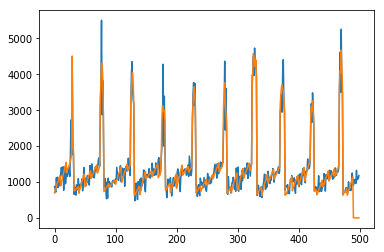

0.34953677930854726


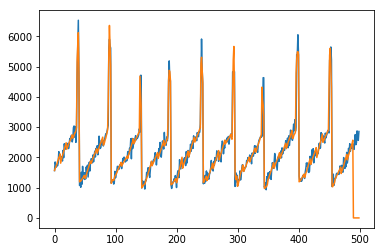

0.3544046826968998


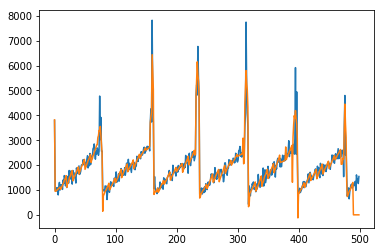

0.35480874774611926


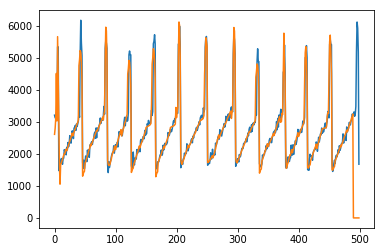

0.3820483880388446


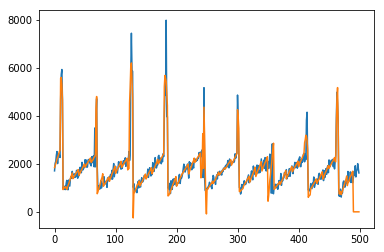

0.4163671032193108
Best reconstructions of ordinary lightcurves


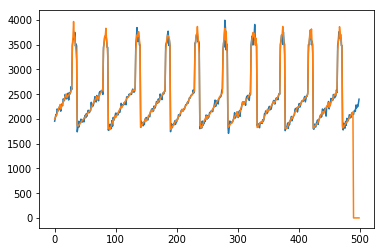

0.14587740404407462


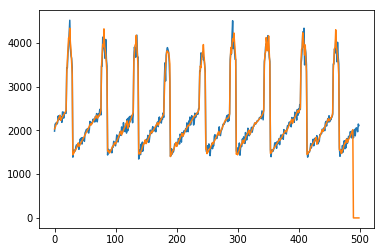

0.164979046370661


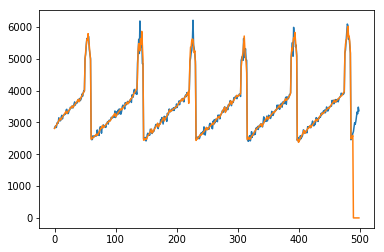

0.1668601088967369


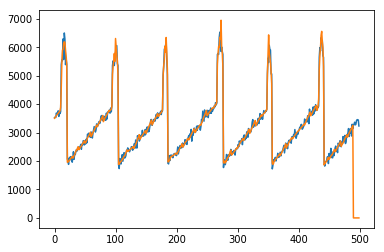

0.16856534897363445


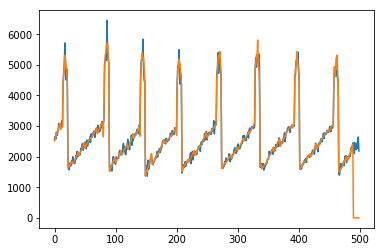

0.16863071096922105
Worst reconstructions of outlier lightcurves


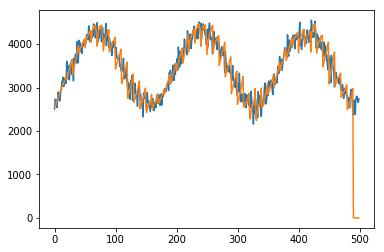

0.26803755678413194


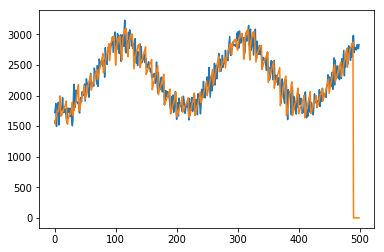

0.2992229448209644


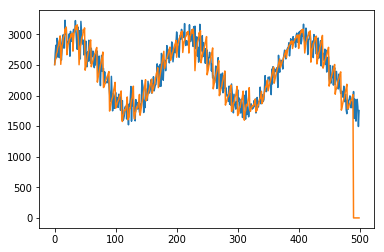

0.3114399785201732


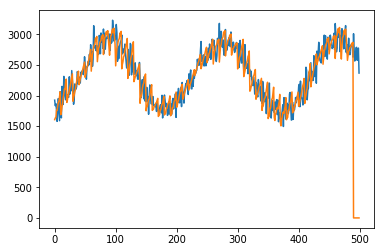

0.32064870215515756


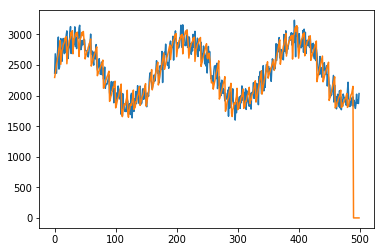

0.33187458121210045
Best reconstructions of outlier lightcurves


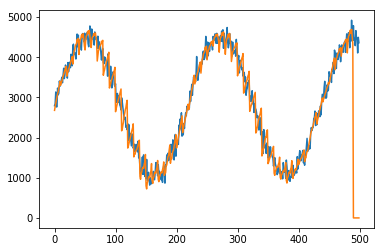

0.17368562694512305


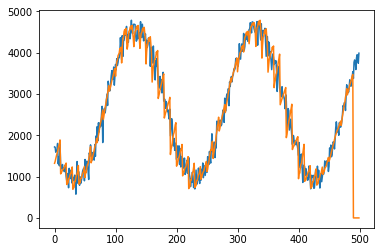

0.17428855523261658


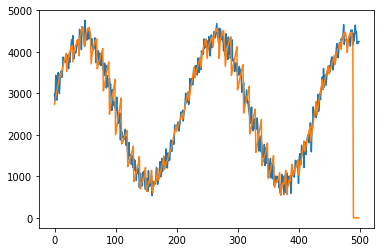

0.1768461716919707


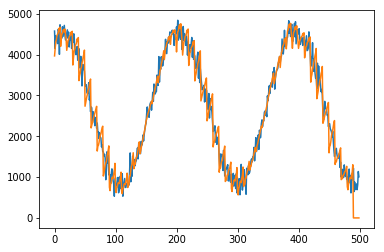

0.17695615874157533


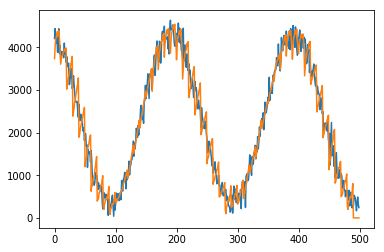

0.17715816964109896
('no. clusters: ', 150, 'segment length: ', 50)
Worst reconstructions of ordinary lightcurves


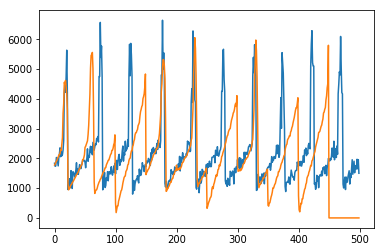

0.9129571227883788


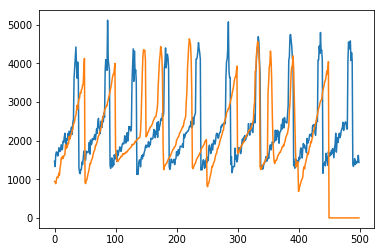

0.9289967662791923


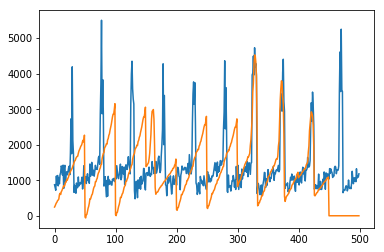

0.9757691546593209


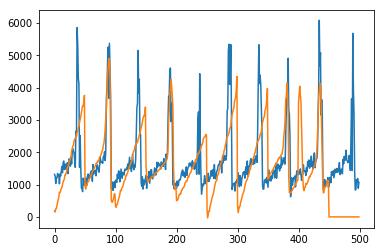

0.9763407543857127


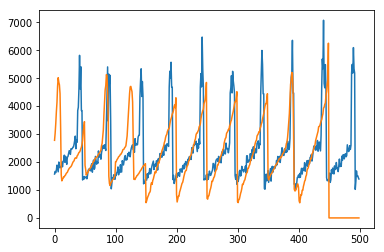

0.9872835359991066
Best reconstructions of ordinary lightcurves


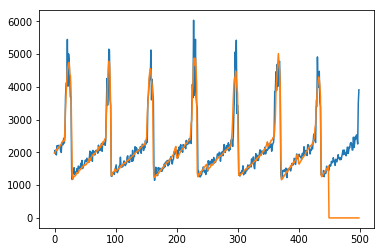

0.35495334543335166


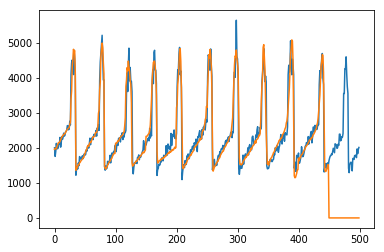

0.3640142630776621


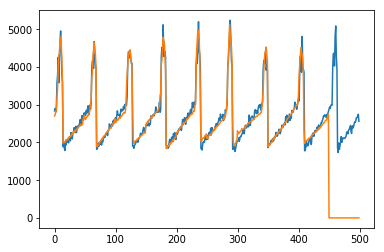

0.3744955557687939


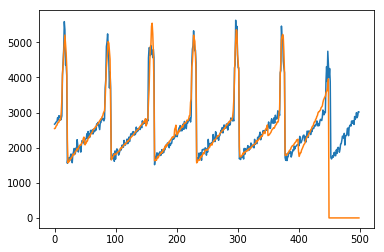

0.3825122060950466


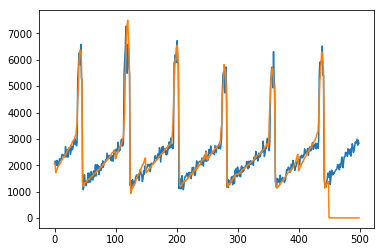

0.3826230747634316
Worst reconstructions of outlier lightcurves


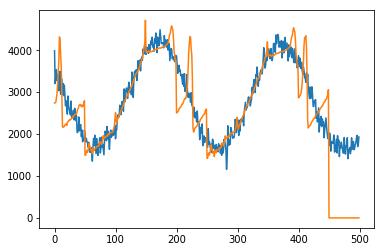

0.6126587021714768


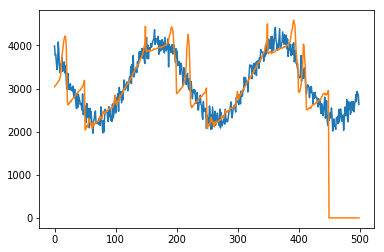

0.6129702563073003


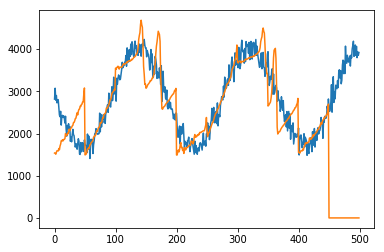

0.6133798807134404


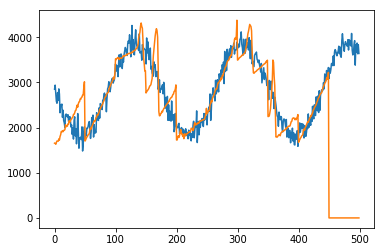

0.6201155197607321


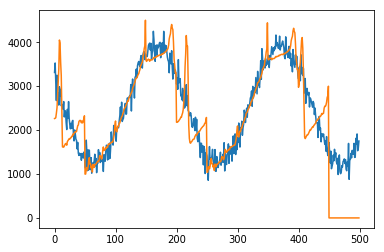

0.620639292073417
Best reconstructions of outlier lightcurves


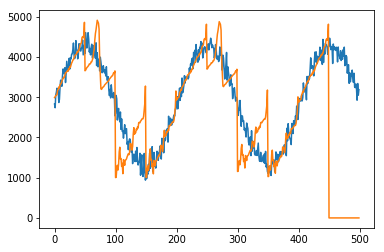

0.5086580497292648


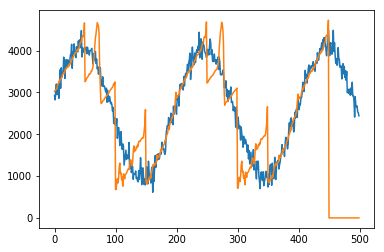

0.5113804359599126


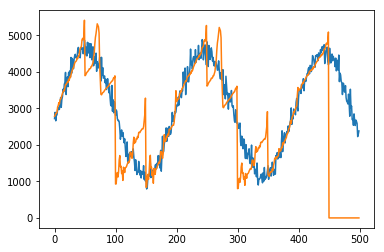

0.5182516088726477


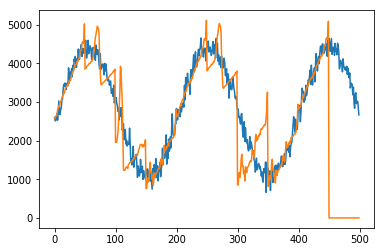

0.5203145633512007


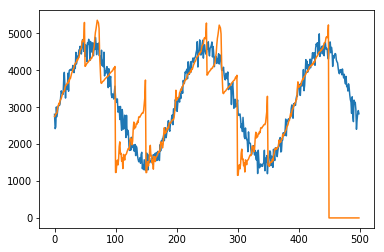

0.5272180678375399
('no. clusters: ', 150, 'segment length: ', 100)
Worst reconstructions of ordinary lightcurves


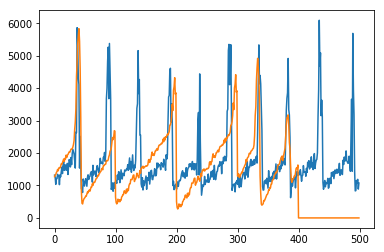

1.0670514517858487


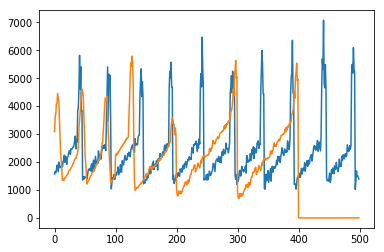

1.067503039017258


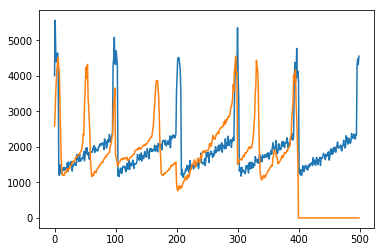

1.072793023239375


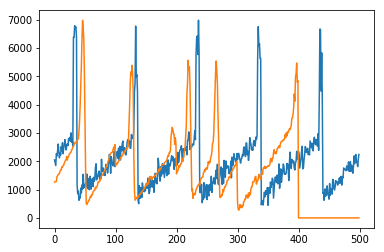

1.0735060820747035


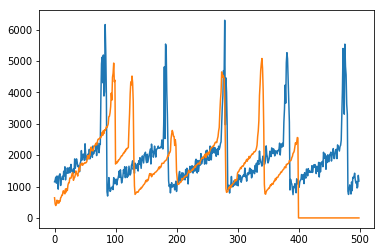

1.1215486762750697
Best reconstructions of ordinary lightcurves


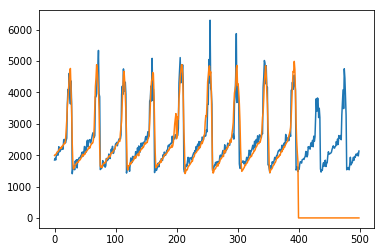

0.5808145261986457


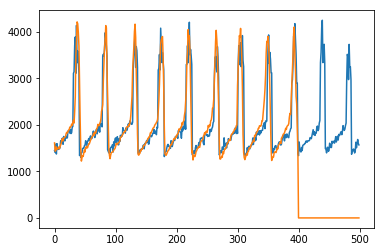

0.5943116236486826


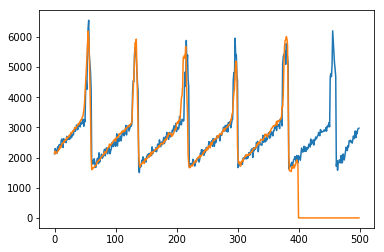

0.5993857979802758


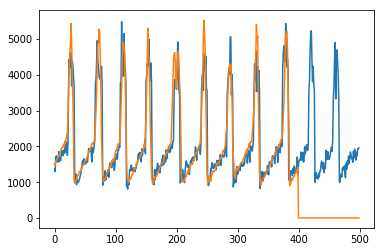

0.6019588644849782


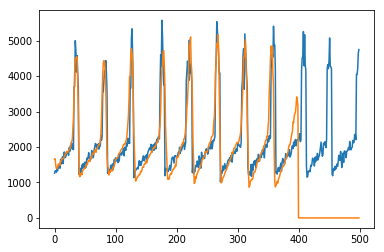

0.6028577896262222
Worst reconstructions of outlier lightcurves


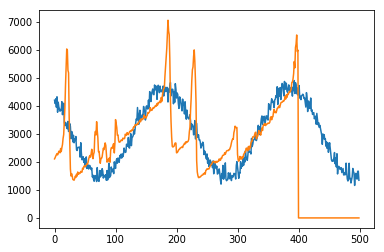

0.8850843151824853


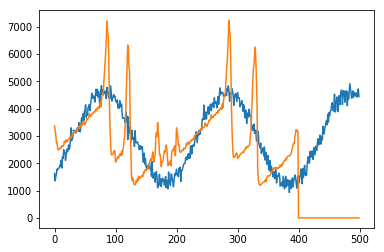

0.8912137069752103


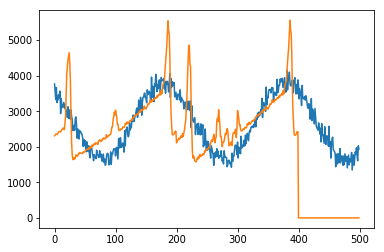

0.8967851687532634


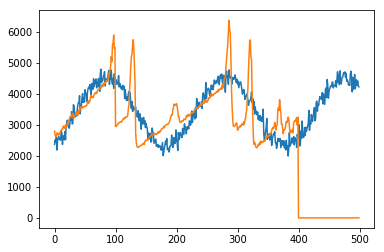

0.8974871039479031


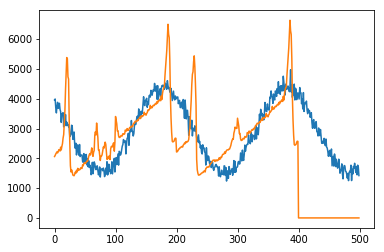

0.8983038574166158
Best reconstructions of outlier lightcurves


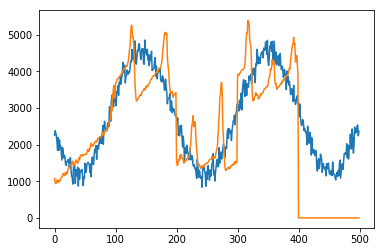

0.6808524443080298


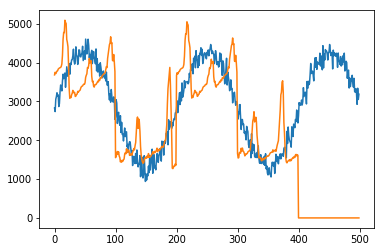

0.6843010137272917


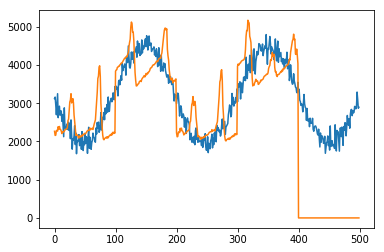

0.6911365720431532


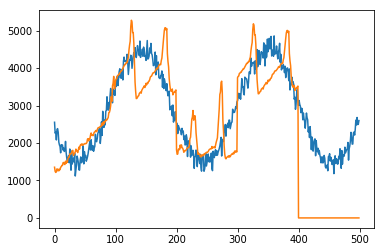

0.6931827527436337


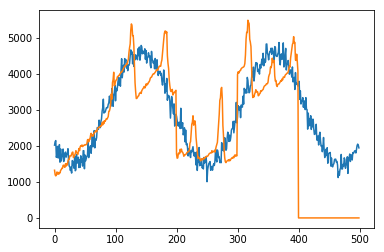

0.6982549304418288
('no. clusters: ', 150, 'segment length: ', 150)
Worst reconstructions of ordinary lightcurves


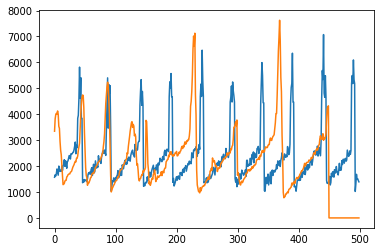

1.0655602576218244


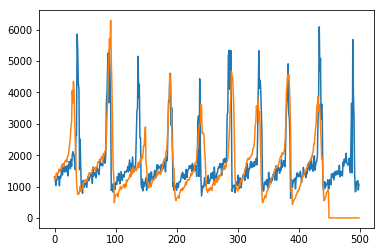

1.0690211715197966


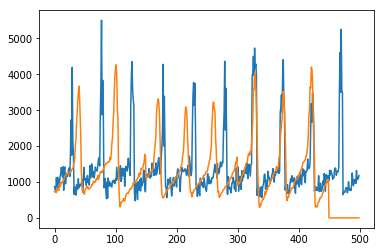

1.0709074481787666


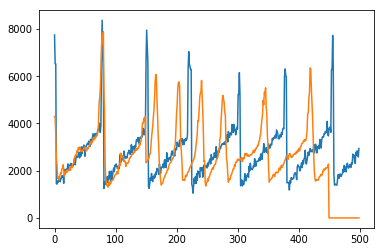

1.0734761213038015


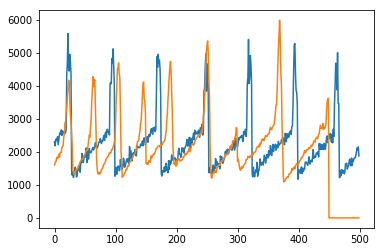

1.0808878189622582
Best reconstructions of ordinary lightcurves


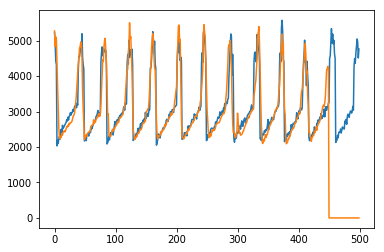

0.629445064399967


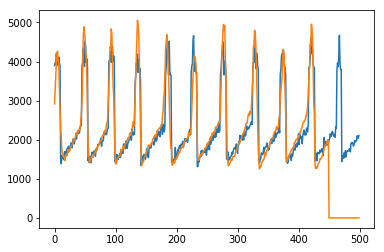

0.6566249356080416


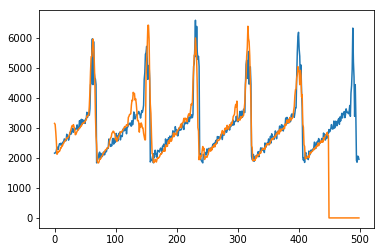

0.6675733905746153


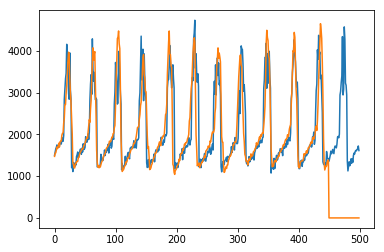

0.672017651075103


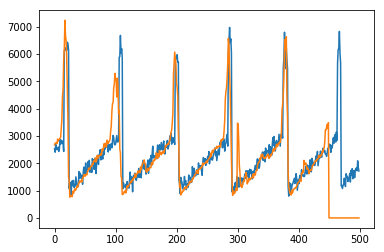

0.6752872870977474
Worst reconstructions of outlier lightcurves


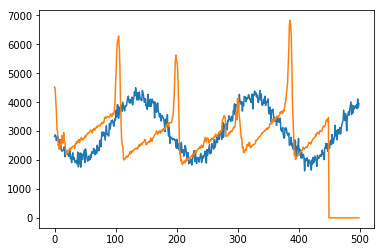

1.0937704067970222


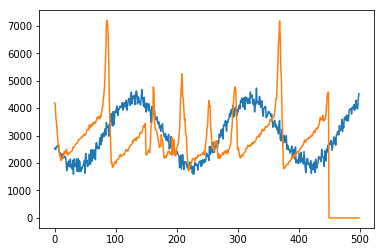

1.0943931168036574


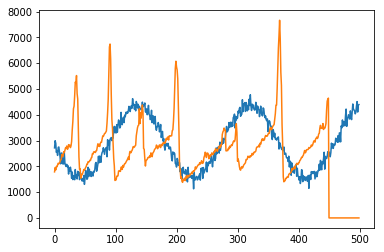

1.0971660191311046


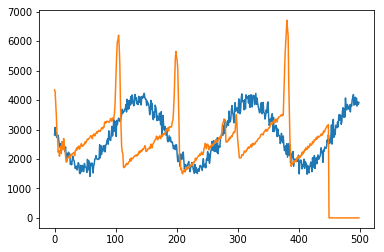

1.0998187099000478


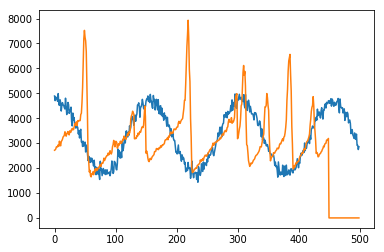

1.1172922462904091
Best reconstructions of outlier lightcurves


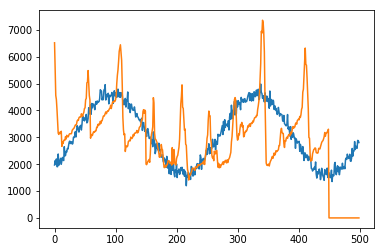

0.9609719692787503


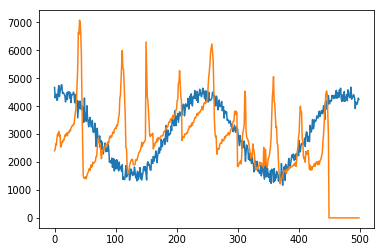

0.9795046813270167


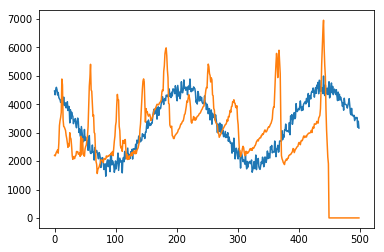

0.986519501083402


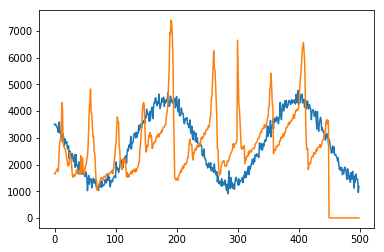

0.9930363264330732


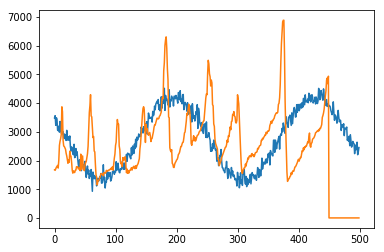

0.9930985733533081
('no. clusters: ', 150, 'segment length: ', 200)
Worst reconstructions of ordinary lightcurves


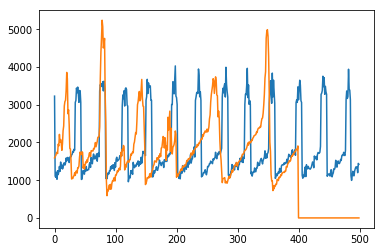

1.0990991288335112


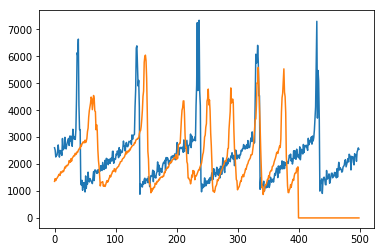

1.099553058931874


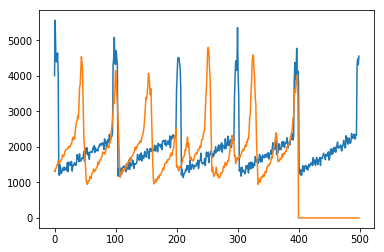

1.0998893690588383


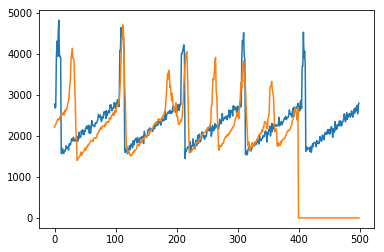

1.1000085686390413


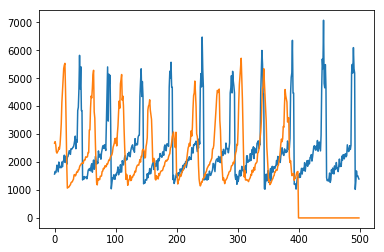

1.105107926098354
Best reconstructions of ordinary lightcurves


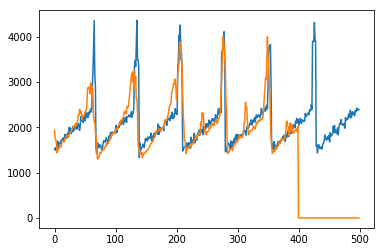

0.6605437149901284


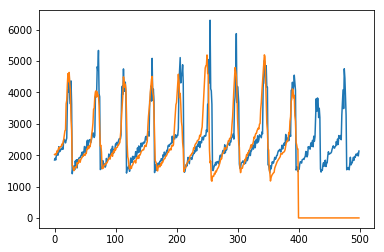

0.6847883571938912


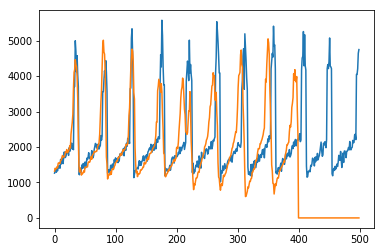

0.695765445572065


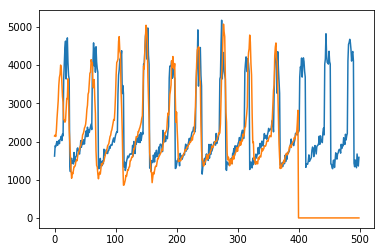

0.6966502033421219


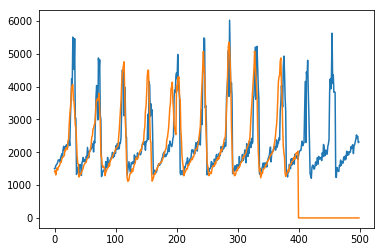

0.6997947997575954
Worst reconstructions of outlier lightcurves


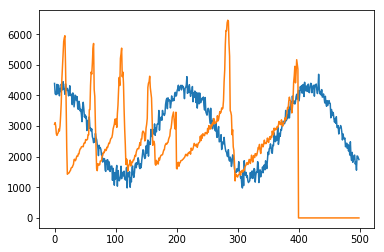

1.133858841767148


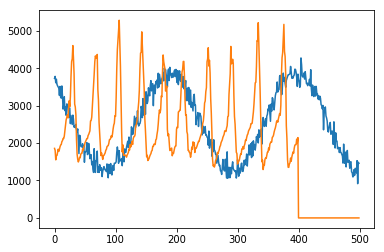

1.134499504663182


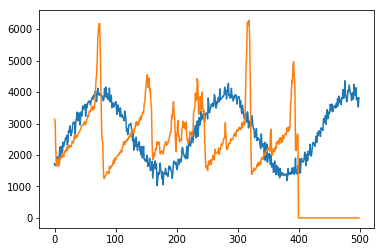

1.1349468943436376


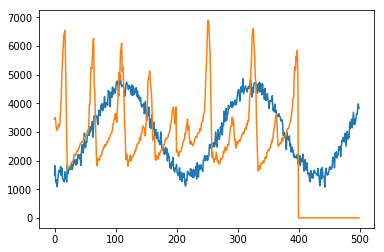

1.1358930885637757


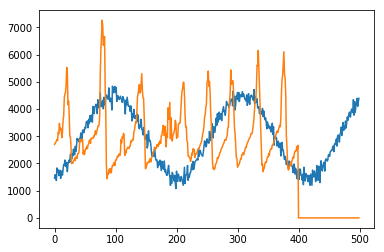

1.136089093731507
Best reconstructions of outlier lightcurves


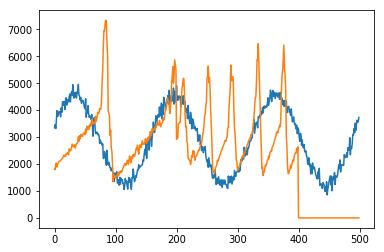

0.9828089786383756


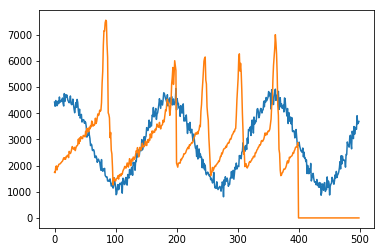

0.9912607599821028


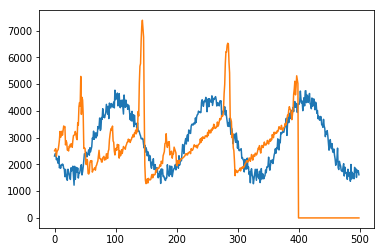

0.9916566401880538


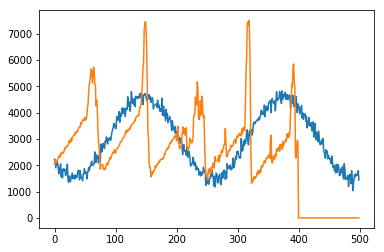

0.9944108660673133


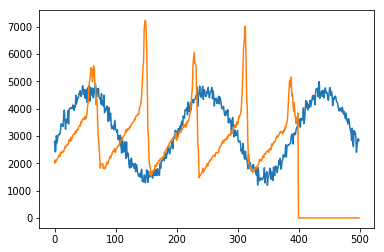

1.0044076458152467


In [20]:

rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))),test_size=0.25, random_state=0)

plot_worst_training=True
plot_best_training=True
plot_worst_test=True
plot_best_test=True

hyperparameter_set=0
for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        print(("no. clusters: ", k_cluster, "segment length: ", seg_len))
        all_train_segments=[]
        for rho in rho_train:
            train_segments=sc.segmentation(rho, seg_len, seg_len, time_stamps=False)
            all_train_segments.append(train_segments)
        all_train_segments=np.vstack(all_train_segments)
        #cluster the segments
        cluster=KMeans(n_clusters=k_cluster, random_state=0)
        cluster.fit(zscore(all_train_segments))
        
        ids=output[int((hyperparameter_set+1)*3 -1)]
        def plot_reco(lc):
            valid_segments= sc.segmentation(lc, seg_len, seg_len , time_stamps=False)
            reco, error = sc.reconstruct(valid_segments, lc, cluster, rel_offset=False, seg_slide=seg_len)
            #error=np.sqrt(np.mean((lc[0:-seg_len]-reco[0:-seg_len])**2))
            plt.plot(lc)
            plt.plot(reco)
            plt.show()
            print(error)
            return
        
        if plot_worst_training is True:
            print("Worst reconstructions of ordinary lightcurves")
            for lc_id in ids[0]:
                lc=rho_valid[lc_id]
                plot_reco(lc)
        
        if plot_best_training is True:
            print("Best reconstructions of ordinary lightcurves")
            for lc_id in ids[1]:
                lc=rho_valid[lc_id]
                plot_reco(lc)
        if plot_worst_test is True:
            print("Worst reconstructions of outlier lightcurves")
            for lc_id in ids[2]:
                lc=sine_file[lc_id]
                plot_reco(lc)
        if plot_best_test is True:
            print("Best reconstructions of outlier lightcurves")
            for lc_id in ids[3]:
                lc=sine_file[lc_id]
                plot_reco(lc)
        
        hyperparameter_set+=1

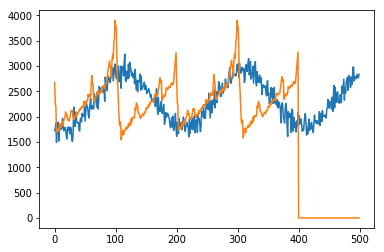

1125.68696544148


In [68]:
import os
import fnmatch
import csv
import numpy as np
import sys
sys.stdout.flush()
import math

from collections import Counter

from sklearn import tree


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import segment_cluster as sc
import importlib
importlib.reload(sc)


np.random.seed(0)

#"normal" lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
#"outlier" lightcurves
sine_file=np.loadtxt("synthetic_sines_range_wide.csv", delimiter=',')

rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))) ,test_size=0.25)


#reco_classes=[]
k_cluster=150
seg_len=200

##train the model
#loop throught the light curves of a given class and segments them
all_train_segments=[]
for rho in rho_train:
    train_segments=sc.segmentation(rho, seg_len, seg_len, time_stamps=False)
    all_train_segments.append(train_segments)
all_train_segments=np.vstack(all_train_segments)
#cluster the segments
cluster=KMeans(n_clusters=k_cluster, random_state=0)
cluster.fit(all_train_segments)

        #reconstruction loop through light curves for every class other than rho              
sine=sine_file[122]
valid_segments= sc.segmentation(sine, seg_len, seg_len , time_stamps=False)
reco = sc.reconstruct(valid_segments, sine, cluster, rel_offset=False, seg_slide=seg_len)
plt.plot(sine)
plt.plot(reco)
plt.show()
print(np.sqrt(np.mean((reco-sine)**2)))
        
#         reco_error_ar=np.array(reco_error)
#         max_rho=reco_error_ar[(reco_error_ar[:,-1]==np.max(reco_error_ar[:,-1]))][0]
#         valid_segments= sc.segmentation(rho_valid[int(max_rho[3])], seg_len, seg_len , time_stamps=False)
#         reco, error = sc.reconstruct(valid_segments, rho_valid[int(max_rho[3])], cluster, rel_offset=False, seg_slide=seg_len)
#         f = plt.figure()
#         ax = f.add_subplot(211)
#         plt.plot(rho_valid[int(max_rho[3])])
#         plt.plot(reco)
#         plt.ylim([0,10000])
#         plt.text(1,1,"k= {}\nlen= {}\n error= {}".format(k_cluster, seg_len, round(max_rho[-1],1)),
#                  ha='right', va='top', transform=ax.transAxes)
#         min_rho=reco_error_ar[(reco_error_ar[:,-1]==np.min(reco_error_ar[:,-1]))][0]
#         valid_segments= sc.segmentation(rho_valid[int(min_rho[3])], seg_len, seg_len , time_stamps=False)
#         reco, error = sc.reconstruct(valid_segments, rho_valid[int(min_rho[3])], cluster, rel_offset=False, seg_slide=seg_len)


In [75]:
np.random.randint(500)

311

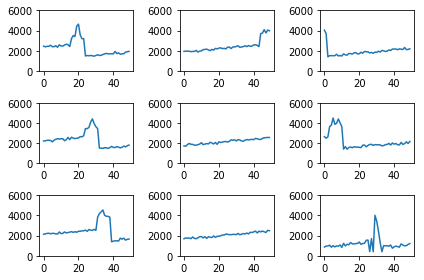

In [39]:
f = plt.figure()

for n, seg in enumerate(cluster.cluster_centers_[0:9]):
    ax = f.add_subplot(3,3,n+1)
    plt.plot(seg)
    plt.ylim(0,6000)
plt.tight_layout()
plt.show()
                              

In [11]:
interval

265.9890335025607

In [16]:
np.savetxt("synthetic_sines_wide.csv" ,sines, delimiter=',')

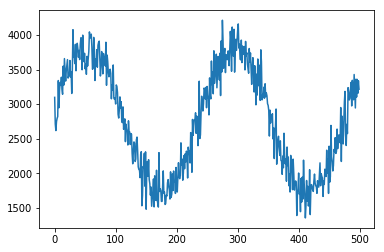

In [14]:
pred_centroid_index=kmeans_model.predict(np.array(segment).reshape(1, -1))[0]

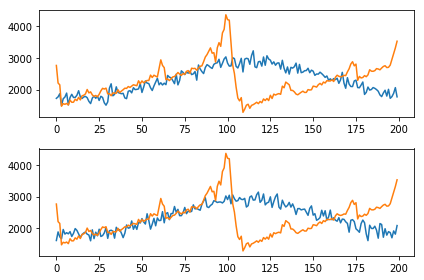

1125.68696544148


In [70]:
import os
import fnmatch
import csv
import numpy as np
import sys
sys.stdout.flush()
import math

from collections import Counter

from sklearn import tree


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import segment_cluster as sc
import importlib
importlib.reload(sc)


np.random.seed(0)

#"normal" lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
#"outlier" lightcurves
sine_file=np.loadtxt("synthetic_sines_range_wide.csv", delimiter=',')

rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))) ,test_size=0.25)


#reco_classes=[]
k_cluster=150
seg_len=200


##train the model
#loop throught the light curves of a given class and segments them
all_train_segments=[]
for rho in rho_train:
    train_segments=sc.segmentation(rho, seg_len, seg_len, time_stamps=False)
    all_train_segments.append(train_segments)
all_train_segments=np.vstack(all_train_segments)
#cluster the segments
cluster=KMeans(n_clusters=k_cluster, random_state=0)
cluster.fit(all_train_segments)

        #reconstruction loop through light curves for every class other than rho              
sine=sine_file[122]
valid_segments= sc.segmentation(sine, seg_len, seg_len , time_stamps=False)
# for seg in valid_segments:
#     plt.plot(seg)
#     pred_centroid_index=cluster.predict(np.array(seg).reshape(1, -1))[0]
#     plt.plot(cluster.cluster_centers_[pred_centroid_index])
#     plt.show()
    
    
f = plt.figure()

for n, seg in enumerate(valid_segments[0:9]):
    ax = f.add_subplot(2,1,n+1)
    plt.plot(seg)
    pred_centroid_index=cluster.predict(np.array(seg).reshape(1, -1))[0]
    plt.plot(cluster.cluster_centers_[pred_centroid_index])
plt.tight_layout()
plt.show()
print(np.sqrt(np.mean((reco-sine)**2)))

(array([ 5., 12., 25., 33., 47., 48., 41., 26., 10.,  3.]),
 array([162.8435388 , 170.38372216, 177.92390552, 185.46408889,
        193.00427225, 200.54445561, 208.08463898, 215.62482234,
        223.16500571, 230.70518907, 238.24537243]),
 <a list of 10 Patch objects>)

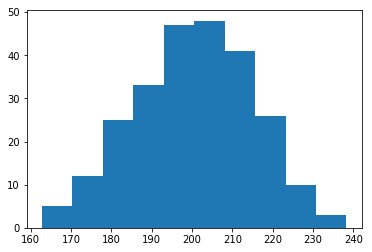

In [14]:
plt.hist(np.random.normal(200, 15,250))

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split


#synthesise sine waves that span the same range as the synthetic rho

#"normal" lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))) ,test_size=0.25)
list_mins=np.min(rho_train, axis=1)
list_maxs=np.max(rho_train, axis=1)

small_maxs=list_maxs[np.where(list_maxs<5000)[0]]

#"outlier" lightcurves
no_sines=250
lc_len=500
sines=np.zeros((no_sines,lc_len))
for sine in range(no_sines):
    #wavelength of 30-160
    start=np.random.rand()*2*np.pi
    interval=np.random.normal(200, 15)
    xs=np.linspace(start,(lc_len/interval)*2*np.pi+start, num=500)
    ys=np.sin(xs)
    range_ind=np.random.randint(len(small_maxs))
    ys+=1
    ys=(ys/2)*(small_maxs[range_ind]-list_mins[range_ind])
    ys+=np.random.normal(0,200 ,len(ys))
    if np.min(ys)<0:
        ys+=abs(np.min(ys))
    ys*=(small_maxs[range_ind]-list_mins[range_ind])/np.max(ys)
    ys+=list_mins[range_ind]
    sines[sine,:]=ys

k_clusters:  [150, 200, 250] 
seg_lens:  [10, 20, 30, 40]


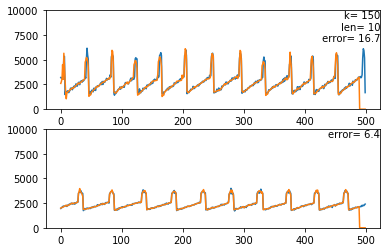

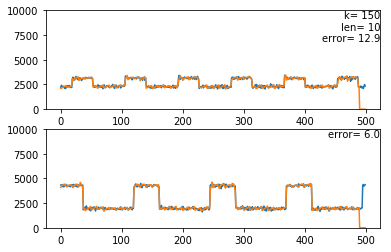

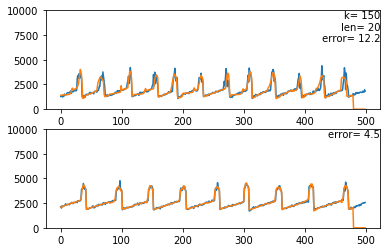

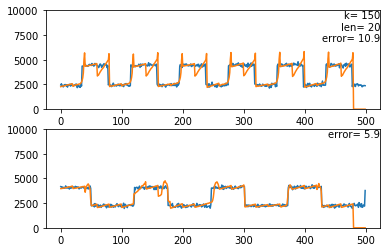

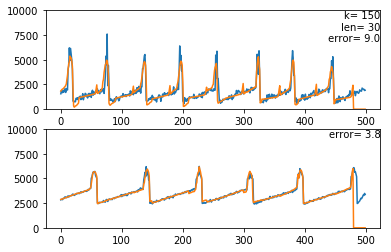

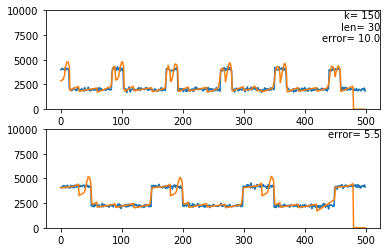

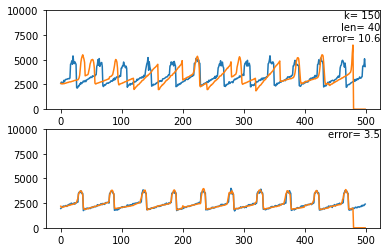

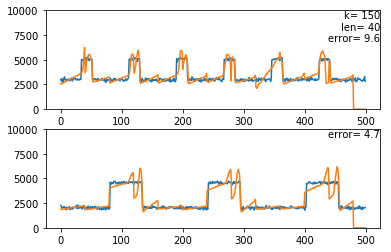

KeyboardInterrupt: 

In [65]:
import os
import fnmatch
import csv
import numpy as np
import sys
sys.stdout.flush()
import math

from collections import Counter

from sklearn import tree


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import segment_cluster as sc
import importlib
importlib.reload(sc)


np.random.seed(0)

#"normal" lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
#"outlier" lightcurves
sine_file=np.loadtxt("synthetic_boxes_thick.csv", delimiter=',')

rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))) ,test_size=0.25)


# inverted_rho=np.copy(rho_valid)
# sine_file=inverted_rho
# for n, in_rho in enumerate(inverted_rho):
#     rho_mean=np.mean(in_rho)
#     inverted_rho[n]-=np.mean(in_rho)
#     inverted_rho[n]*=-1
#     inverted_rho[n]+=abs(np.min(inverted_rho[n])-np.min(rho_valid[n]))




reco_error=[]
#reco_classes=[]
k_clusters=[150, 200, 250]
seg_lens=[10, 20, 30, 40]
print("k_clusters: ", k_clusters, "\nseg_lens: ", seg_lens, flush=True)

for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        ##train the model
        #loop throught the light curves of a given class and segments them
        all_train_segments=[]
        for rho in rho_train:
            train_segments=sc.segmentation(rho, seg_len, seg_len, time_stamps=False)
            all_train_segments.append(train_segments)
        all_train_segments=np.vstack(all_train_segments)
        #cluster the segments
        cluster=KMeans(n_clusters=k_cluster, random_state=0)
        cluster.fit(zscore(all_train_segments))

        ### reconstruction of the training class
        for n_rho, rho in enumerate(rho_valid):
            valid_segments= sc.segmentation(rho, seg_len, seg_len , time_stamps=False)
            reco, error = sc.reconstruct(valid_segments, rho, cluster, rel_offset=False, seg_slide=seg_len)
            #error=np.sqrt(np.mean((rho[seg_len:-seg_len]-reco[seg_len:-seg_len])**2))
            reco_error.append((k_id,len_id,0, n_rho, error))
            #print((k_id,len_id,0, n_rho, error), flush=True)
        
        reco_error_ar=np.array(reco_error)
        max_rho=reco_error_ar[(reco_error_ar[:,-1]==np.max(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(rho_valid[int(max_rho[3])], seg_len, seg_len , time_stamps=False)
        reco, error = sc.reconstruct(valid_segments, rho_valid[int(max_rho[3])], cluster, rel_offset=False, seg_slide=seg_len)
        f = plt.figure()
        ax = f.add_subplot(211)
        plt.plot(rho_valid[int(max_rho[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"k= {}\nlen= {}\n error= {}".format(k_cluster, seg_len, round(max_rho[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        min_rho=reco_error_ar[(reco_error_ar[:,-1]==np.min(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(rho_valid[int(min_rho[3])], seg_len, seg_len , time_stamps=False)
        reco, error = sc.reconstruct(valid_segments, rho_valid[int(min_rho[3])], cluster, rel_offset=False, seg_slide=seg_len)
        ax = f.add_subplot(212)
        plt.plot(rho_valid[int(min_rho[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"error= {}".format(round(min_rho[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        plt.show()
        reco_error=[]

        #reconstruction loop through light curves for every class other than rho              
        for n_sine, sine in enumerate(sine_file):
            valid_segments= sc.segmentation(sine, seg_len, seg_len , time_stamps=False)
            reco, error = sc.reconstruct(valid_segments, sine, cluster, rel_offset=False, seg_slide=seg_len)
            #error=np.sqrt(np.mean((sine[seg_len:-seg_len]-reco[seg_len:-seg_len])**2))
            reco_error.append((k_id,len_id,1,n_sine, error))
            #print((k_id,len_id,1,n_sine, error), flush=True)
            
        reco_error_ar=np.array(reco_error)
        max_test=reco_error_ar[(reco_error_ar[:,-1]==np.max(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(sine_file[int(max_test[3])], seg_len, seg_len , time_stamps=False)
        reco, error = sc.reconstruct(valid_segments, sine_file[int(max_test[3])], cluster, rel_offset=False, seg_slide=seg_len)
        f = plt.figure()
        ax = f.add_subplot(211)
        plt.plot(sine_file[int(max_test[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"k= {}\nlen= {}\nerror= {}".format(k_cluster, seg_len, round(max_test[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        
        min_test=reco_error_ar[(reco_error_ar[:,-1]==np.min(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(sine_file[int(min_test[3])], seg_len, seg_len , time_stamps=False)
        reco, error = sc.reconstruct(valid_segments, sine_file[int(min_test[3])], cluster, rel_offset=False, seg_slide=seg_len)
        ax = f.add_subplot(212)
        plt.plot(sine_file[int(min_test[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"error= {}".format(round(min_test[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        plt.show()
        
        reco_error=[]
        

In [80]:
cluster.cluster_centers_=cluster.cluster_centers_-np.mean(cluster.cluster_centers_,axis=0)
cluster.cluster_centers_

In [81]:
cluster.cluster_centers_

array([[ -395.0894811 ,  -855.65340578,  -867.8786459 , ...,
         -682.0097338 ,  -634.49907848,  -594.93958734],
       [  469.91062972,  -105.46051611,  -144.71469313, ...,
          883.26856525,  1073.68651913,  1277.19397362],
       [  884.47656245,   663.71264622,   269.83350472, ...,
         -535.39159088,  -494.4179419 ,  -475.81726815],
       ...,
       [-1199.81907559, -1058.66838262, -1027.5680172 , ...,
        -1010.16728138, -1111.71081343, -1092.36760471],
       [   66.00748687,   114.54912908,   135.78880899, ...,
         -367.19087083,  -433.37232962,  -350.65375143],
       [ -531.07535911,  -491.50480685,  -474.68632577, ...,
         -802.78223468,  -624.75802709,  -563.75736643]])